# Final Tutorial Project 
## Group Members: Meghana Karumuri and Robyn Scher

## Outline


* 1\. Introduction
    *   1.1 Background Information
    *   1.2 Libraries Used
    *   1.3 About the Data
    *   1.4 Data Source


* 2\.   Load, View, and Tidy Data
* 3\.   Exploratory Data Analysis
* 4\.   Machine Learning
    *   4.1 Dataset Standardization (Create training and testing datasets)
    *   4.2 Linear Regression Model 
    *   4.3 Random Forest Regression Model
* 5\.   Conclusion




## 1. Introduction
#### In this project, we want to analyze happiness scores of populations around the world and their relationship with features such as GDP per capita, Region, Freedom, Life Expectancy, and Social Support using data for countries across 2015-2019. 

### 1.1 Background Information
#### Examining the happiness of a country can be a good indicator of the overall state of a country. The happiness of a country can be informative in making policy decisions. Features that influence the happiness of a country can also be examined to determine how a country can improve themselves by making more effective decisions. The happiness of a country can also overall determined the country's health and show if it is a good place to live. Happiness can be measured through polls that measure a population's quality of life.

### 1.2 Libraries used:


*   Numpy: Mathematical library for working with arrays
*   Pandas: Used for constructing and manipulating dataframes
*   Seaborn: Graphing library used for creating violinplots
*   Matplotlib: Used for plotting
*   Scikit Learn: Used for constructing machine learning models
*   Statmodels.api: Library which has function for estimation of statistical models





In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### 1.3 About the data
#### The World Happiness Report dataset we are using is a "landmark survey of the state of global happiness." The World Happiness Report was initially released at an United Nations Event which was held to celebrate the International Day of Happiness. It has drawn global attention since happiness indicators can be used to inform policy-making decisions. The happiness scores of the countries in the dataset are determined through a key question in the Gallup World Poll which asked people to evaluate their life on a scale of 1 to 10. Other features that may impact the happiness score evaluation of a country such as inidcators of the economy, government perception, freedom, life expectancy, etc. are also included in the dataset and may explain why some countries have higher happiness scores than others. There are 5 datasets available across the years 2015-2019 with such information. These datasets can be further examined to determine if certain features influence the happiness score of a country. 

### 1.4 Data Source
#### The data for each year between 2015-2019 was obtained from a public dataset available on Kaggle. Here is the link to the dataset: https://www.kaggle.com/unsdsn/world-happiness
#### Although the datasets provided on Kaggle are already tidy, there are many differences in the structure and data available for each year. The data for each year has varying features, some of which aren't available in other data sets. Composing one large dataset for all the information over all five years requires some additional data cleaning operations to tidy the data. 

## 2. Load, View, and Tidy Data

#### COLAB ONLY: Mount to google drive. This code should be removed if not working in a Google Colab environment.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Obtain csv data files for all years from project files. These file paths can be modified to show where the csv files obtained from Kaggle are located in the project directory. This requires modification especially if not in a Google Colab environment.

In [3]:
# Dataset filepaths are stored as variables
data_fname_2019 = 'gdrive/My Drive/finalproject/2019.csv'
data_fname_2018 = 'gdrive/My Drive/finalproject/2018.csv'
data_fname_2017 = 'gdrive/My Drive/finalproject/2017.csv'
data_fname_2016 = 'gdrive/My Drive/finalproject/2016.csv'
data_fname_2015 = 'gdrive/My Drive/finalproject/2015.csv'

#### The first step is to load the five datasets for each year as individual dataframes. This can be done by using functionality in the Pandas library to read in csv files as dataframes. Each of these dataframes are stored as a variable.

In [4]:
# Load csv file datasets as dataframes
data_2019 = pd.read_csv(data_fname_2019)
data_2018 = pd.read_csv(data_fname_2018)
data_2017 = pd.read_csv(data_fname_2017)
data_2016 = pd.read_csv(data_fname_2016)
data_2015 = pd.read_csv(data_fname_2015)

#### Before we can make any changes, we must visualize the raw data to see what differences must be made to create one large dataframe. All of the dataframes are visualized using the function *dataframe*.**head()**. This helps us see the state of the initial data.

In [5]:
data_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [6]:
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [8]:
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Upon initial visualization of the dataframes, it is clear the structure of each of the datasets are different. The column names are different across dataframes, and there are also additional columns with other indicators such as upper confidence intervals, lower confidence intervals, and standard error in certain years. If we were to combine the dataframes like this to make one large dataframe that encompasses data over all five years being examined, a lot of NaN values or missing data would be created. In order to prevent the generation of missing values and smoothly combine the dataframes, some preprocessing must be done to each data frame for the years. To preprocess and avoid missing values, columns are renamed to have the same name across all datasets. Columns that exist only in certain years and not the others are also dropped. To all of the datasets, an additional column containing year information is also added so that the year of a row of data could also be accessed after combining the dataframes together to create one large dataframe that will help us analyze trends for happiness score. After doing this, we will be able to obtain a tidy dataset.

In [10]:
# Tidy the datasets for each year
# Rename columns in each dataset so that columns are labeled in the same way
data_2019 = data_2019.rename(columns={"Freedom to make life choices" : "Freedom", "Country or region" : "Country", "Perceptions of corruption":"Trust (Government Corruption)", "Healthy life expectancy":"Health (Life Expectancy)"})
data_2018 = data_2018.rename(columns={"Freedom to make life choices" : "Freedom", "Country or region" : "Country", "Perceptions of corruption":"Trust (Government Corruption)", "Healthy life expectancy":"Health (Life Expectancy)"})
data_2017 = data_2017.rename(columns={"Happiness.Rank": "Overall rank", "Happiness.Score": "Score", "Economy..GDP.per.Capita.":"GDP per capita", "Health..Life.Expectancy.":"Health (Life Expectancy)", "Trust..Government.Corruption." : "Trust (Government Corruption)", "Family":"Social support", "Dystopia.Residual": "Dystopia Residual"})
data_2016 = data_2016.rename(columns={"Family" : "Social support", "Happiness Rank" : "Overall rank", "Happiness Score": "Score", "Economy (GDP per Capita)": "GDP per capita"})
data_2015 = data_2015.rename(columns={"Family" : "Social support", "Happiness Rank" : "Overall rank", "Happiness Score": "Score", "Economy (GDP per Capita)": "GDP per capita"})

# Drop any columns that uniquely exist in certain dataframes
data_2017 = data_2017.drop(['Whisker.high', 'Whisker.low'], axis = 1)
data_2016 = data_2016.drop(["Lower Confidence Interval", "Upper Confidence Interval"], axis = 1)
data_2015 = data_2015.drop(["Standard Error"], axis = 1)

# Add a column containing year information for each dataframe
data_2019["Year"] = 2019
data_2018["Year"] = 2018
data_2017["Year"] = 2017
data_2016["Year"] = 2016
data_2015["Year"] = 2015

# Combine All 5 datasets containing information for each year across 2015-2019
datasets = [data_2019, data_2018, data_2017, data_2016, data_2015]
df = pd.concat(datasets, ignore_index=True)

# Drop insignifcant rows and rows with missing values. The ranks are not used in analysis and the Dystopia Residual is missing for some years
df = df.drop(['Dystopia Residual', 'Overall rank'], axis = 1)

# Visualize the final combined dataset
df

,Country,Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019,NaN
1,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019,NaN
2,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019,NaN
3,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019,NaN
4,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019,NaN
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015,Sub-Saharan Africa
778,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015,Sub-Saharan Africa
779,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015,Middle East and Northern Africa
780,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015,Sub-Saharan Africa


#### As you can see there still are some issues present with our dataframe, and our data is not yet tidy. It is clear there are missing values for Region present in the dataframe above. There is data present in some of the initial 5 datasets which include the region for each country that is examined. This region data, however, is important for analysis and is missing in some of the datasets. When combined into one large dataframe, this generates missing values. However, the missing values can be filled in by looking at the countries where region was specified in previous datasets and use that value to fill in the empty NaN values. 

#### To solve the issue of missing region data, the following code creates a dictionary and loops through the code obtaining the region associated with all possible countries. Then the region values in the dataframe are mapped to the region in the dictionary by country. As a result this creates a dataframe with all missing values filled in. 

In [11]:
# Create empty dictionary
region = {}

# Add all known countries and their associated Region value to dictionary
for i, r in data_2015.iterrows():
  if not r['Country'] in region.keys():
    region[r['Country']] = r['Region']

# Map region in dataframe by the value associated with each country to fill missing values
df['Region']=df['Country'].map(region)

# Visualize the dataframe
df

,Country,Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Year,Region
0,Finland,7.769,1.34000,1.58700,0.98600,0.59600,0.15300,0.39300,2019,Western Europe
1,Denmark,7.600,1.38300,1.57300,0.99600,0.59200,0.25200,0.41000,2019,Western Europe
2,Norway,7.554,1.48800,1.58200,1.02800,0.60300,0.27100,0.34100,2019,Western Europe
3,Iceland,7.494,1.38000,1.62400,1.02600,0.59100,0.35400,0.11800,2019,Western Europe
4,Netherlands,7.488,1.39600,1.52200,0.99900,0.55700,0.32200,0.29800,2019,Western Europe
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,2015,Sub-Saharan Africa
778,Benin,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,2015,Sub-Saharan Africa
779,Syria,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,2015,Middle East and Northern Africa
780,Burundi,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,2015,Sub-Saharan Africa


#### Now that the data is tidy, we can move on to exploring our dataset to find trends!

## 3. Exploratory Data Analysis

#### Now, we want to examine the relationship between features in our dataset and see if there is any correlation between them. This will help us identify any trends that exist in our dataset and help us see which features seem to be dependent on each other. These trends will help us make useful insights which can be used to predict happiness scores for a given country. It will help us see what features impact a country's quality of life and help policy-makers use this information to govern their choices. The question we are trying to explore is what features impact a country's happiness score and can be used to predict a country's happiness score?

#### The first way we are exploring our data is by looking to see if there is a relationship between happiness score over time. Since we only have five years worth of data, a scatter plot may be ineffeicient for looking at trends over time. The best way to visualize such data would be to create a violin plot which examines the distribution of happiness score values over time. This can be done by using the **violinplot()** function in the library Matplotlib.plt.

#### For more information on how to read and interpret violin plots, we are providing this excellent resource:

#### https://mode.com/blog/violin-plot-examples/

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Happiness Score over Time ')

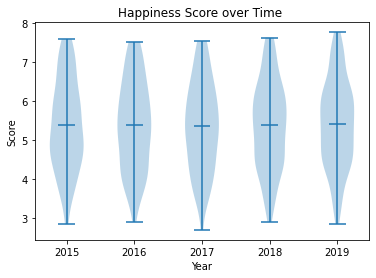

In [12]:
# create a dict which for each year groups score values into arrays 
score_dict = {}
for i, r in df.iterrows():
    if r['Year'] in score_dict:
        score_dict[r['Year']].append(r['Score'])
    else:
        score_dict[r['Year']] = [r['Score']]
          
# use dict keys and values to create violin plot for score over time. The keys are the years and the values are arrays of score data for each year
fig, ax = plt.subplots()
ax.violinplot(score_dict.values(),score_dict.keys(),widths=0.5,showmeans=True)
ax.set_xlabel("Year")
ax.set_ylabel("Score")
ax.set_title("Happiness Score over Time ")

#### Looking at the violin plot, you can see that the data is unimodal and uniformly distributed around a mean happiness score around 5.5 across the years. The data is also not skewed. Analysis of this plot shows that the happiness score does not seem to be increasing or decreasing over time. This makes sense because it shows the happiness score is recorded does not over or under explain average life situations. There seems to be no correlation with happiness over time.

#### Another aspect we can examine is the happiness score over time for each region. Could it be that region is impacting the overall happiness score over time? We can visualize happiness score for each region over time by creating several violin plots. This will allow us to see if region impacts score over time. Are certain regions becoming happier than others as time progresses? Are there any changes to countries that are causing them to progress and become happier between 2015 and 2019?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


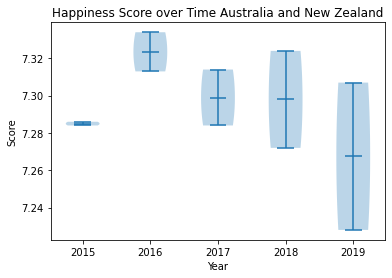

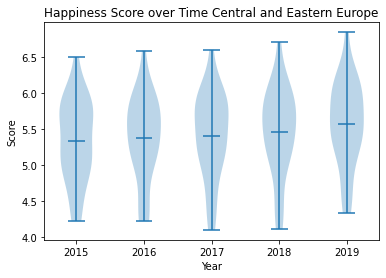

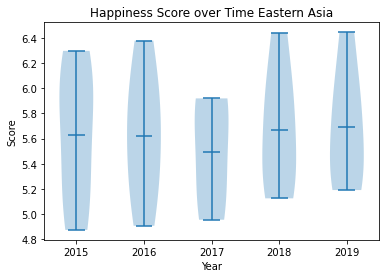

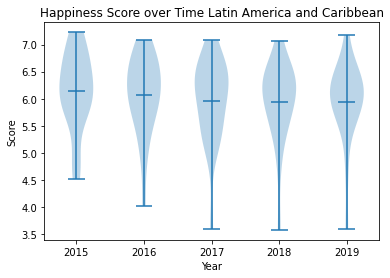

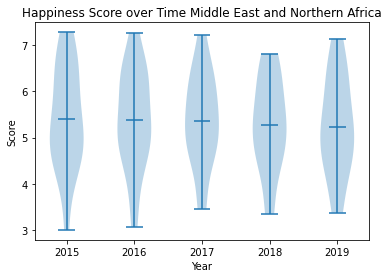

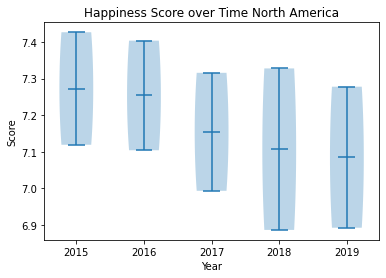

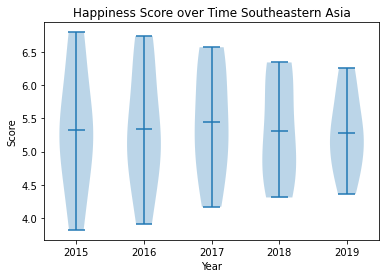

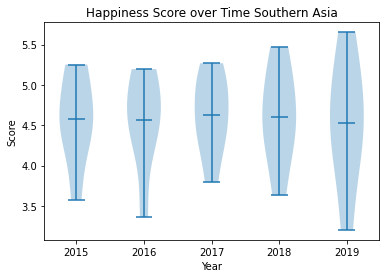

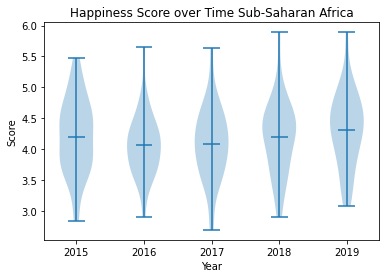

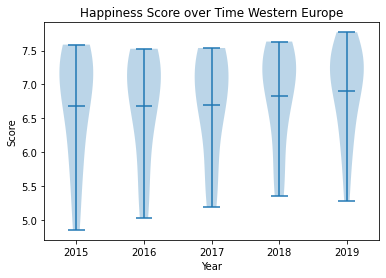

In [13]:
# group the data by region
grouped = df.groupby(by = ["Region"])

# loop through all the region groups
for name, group in grouped:

  # create a dict which for each year groups score values into arrays 
  score_dict = {}
  for i, r in group.iterrows():
      if r['Year'] in score_dict:
          score_dict[r['Year']].append(r['Score'])
      else:
          score_dict[r['Year']] = [r['Score']]
          
  # use dict keys and values to create violin plot for score over time. The keys are the years and the values are arrays of score data for each year
  fig, ax = plt.subplots()
  ax.violinplot(score_dict.values(),score_dict.keys(),widths=0.5,showmeans=True)
  ax.set_xlabel("Year")
  ax.set_ylabel("Score")
  ax.set_title("Happiness Score over Time " + name)


#### Most of the data for happiness score over time in each region matches up with our initial observation on happiness score over time. Most of the regions such as Southern Asia or the Middle East and North Africa have unimodal, uniformly distributed data which are clustered around the mean. This indicates there is no relationship or change for happiness score over time in those regions. However in some regions such as North America, there does appear to be a trend in happiness score over time. In North America, the mean happiness seems to be declining over time and there appears to be a negative correlation. Similarly, the happiness score in Australia and New Zealand seems to be declining over time. The happiness scores in Latin America and the Carribean and Western Europe appear to be skewed since a lot of the data is top heavy. However, based on the general trends of the data it is safe to say that time does not really seem to have a correlation with happiness score and region does not strongly impact happiness score over time. However, since regions such as North America and Australia and New Zealand exhibit some indication of happiness decreasing over time it may be worth to examine more if region has an effect on happiness score. 

To further examine the impact a region has on the happiness score a violin plot could be created to examine the distribution of data for a region across all time. Since we are creating a violin plot with categorical data, we must use Seaborn, a library with many graphical functions, to build our plots. 

Text(0.5, 1.0, 'Happiness Score vs Region')

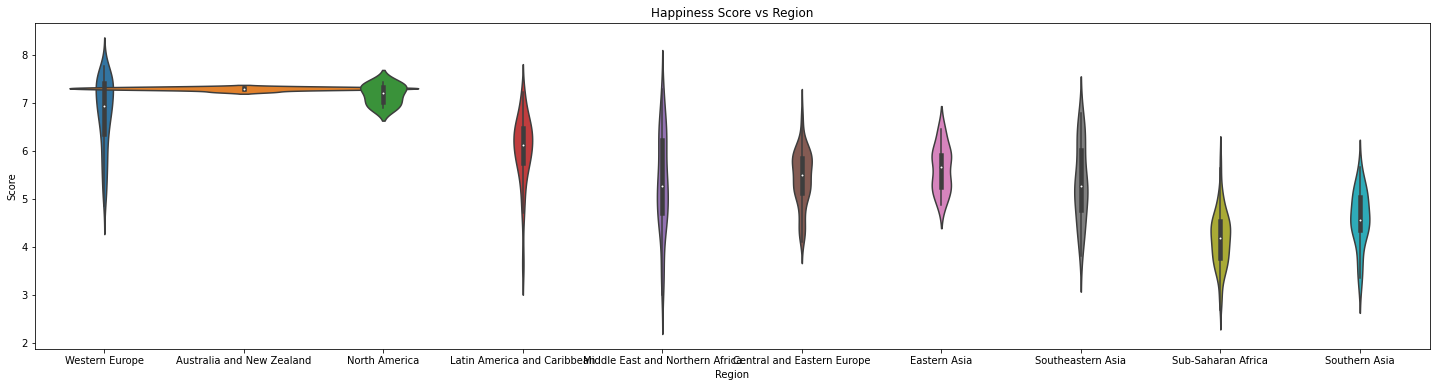

In [14]:
# Use seaborn to build Violin Plot which shows happiness score distribution for each region
f = plt.figure(figsize=(25,6))
ax = sns.violinplot(x = "Region", y = "Score", data = df, width=2.5)
ax.set_xlabel("Region")
ax.set_ylabel("Score")
ax.set_title("Happiness Score vs Region")

#### The violin plot shows how the data is centered differently for each region. The data is centered around the mean however there are differences in the mean for each region. This suggests that there does seem to be a relationship between region and happiness score. For example, Western Europe, Australia and New Zealand, and North America seem to be happier than other regions because their happiness score data is clustered around a higher number and has less of a spread. This indicates that certain regions may be happier. 

#### To see if region may effect any other features, I examined the relationship between GDP per capita of a country and its region. This was done by similarly creatining a violin plot for analysis.

Text(0.5, 1.0, 'GDP per capita vs Region')

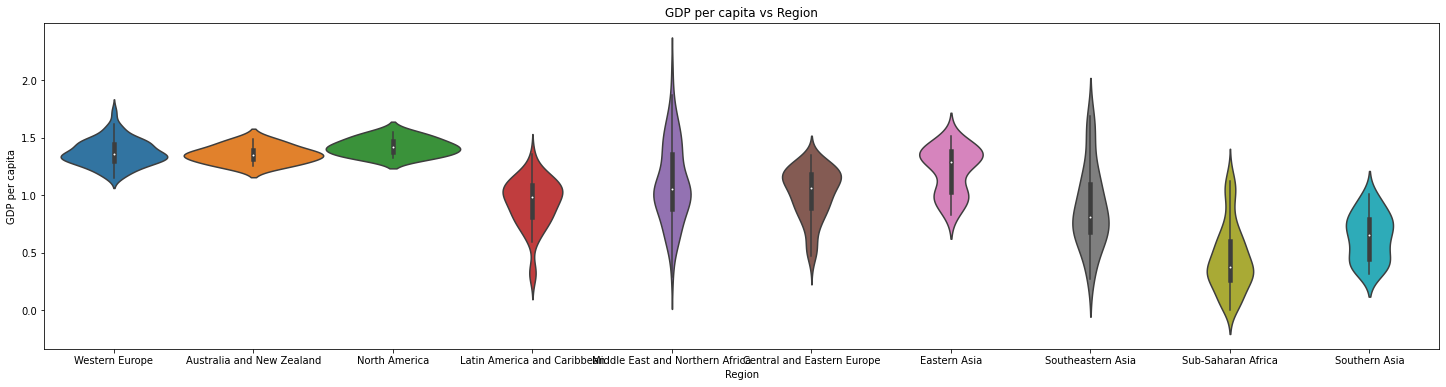

In [15]:
# Use seaborn to build Violin Plot which shows GDP per capita distribution for each region
f = plt.figure(figsize=(25,6))
ax = sns.violinplot(x = "Region", y = "GDP per capita", data = df, width=1)
ax.set_xlabel("Region")
ax.set_ylabel("GDP per capita")
ax.set_title("GDP per capita vs Region")

#### This violin plot seems similarly distributed like the other violin plot which compared happiness score and region. Her you can see that region such as Western Europe, Australia and New Zealand, and North America have higher GDP per capitas. Since they are similarly distributed, this may suggest an underlying correlation between GDP and happiness score. It is clear certain regions are distributed differently, but it is worth examining if there are other features in the dataset that are causing these differences. Now, we will explore the relationship between happiness score and other features within the dataset.

#### The next step is to define a function that can build scatter plots to depict the relationship between two features in the dataset. The function ***plot_features*** takes in the name of a column **x** which will be plotted along the x axis and a column **y** which will be plotted along the y axis. There also is a variable **title** which is taken in as a parameter and is used for adding a title to the plots. The function also defines and adds a regression line to the plot created to help analyze any trends or correlations. 

In [16]:
def plot_features (x, y, title):
  # Plot data
  plt.scatter(df[x], df[y])
  plt.xlabel(x)
  plt.ylabel(y) 
  plt.title(title)

  # Calculate Regression Line
  m, b = np.polyfit(df[x], df[y], 1)
  plt.plot(df[x], m*df[x] + b, color = 'red')

  # Show plot
  plt

#### Now, going off of our previous analysis, it may be worthwhile to examine the relationship between happiness score and GDP per capita since there seemed to be an underlying correlation in the previous violin plots. We can plot the relationship between GDP per capita and happiness score by using the **plot_features** function we defined before.

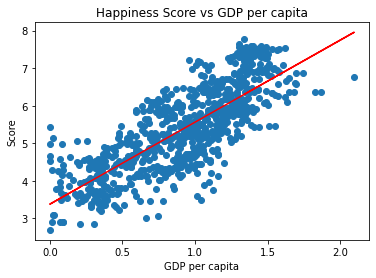

In [17]:
# Plot relationship between GDP per capita and Happiness Score
plot_features('GDP per capita', 'Score','Happiness Score vs GDP per capita' )

#### In the plot above, there appears to be a strong positive linear correlation between GDP per capita and Happiness scores across countries. This correlation incidicates that as GDP per capita increases Happiness scores tend to increase. This may be an important feature to consider when predicting happiness score as higher GDP for a country seems to indicate happier populations. To further analyze if a linear correlation exists in the data, we can analyze the residual plots for a linear regression model.

In [18]:
# Store data as numpy arrays
X = df['GDP per capita'].to_numpy()
Y = df['Score'].to_numpy()

# initialize model
reg = linear_model.LinearRegression()
# Fit a linear regression model to the dataset
reg.fit(X.reshape(-1,1),Y.reshape(-1,1))

LinearRegression()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

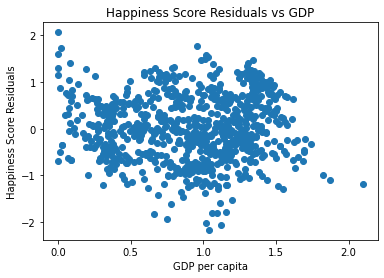

In [19]:
# list for storing calculated residual values
residual = list()

# calculate residuals for each data point
for i,r in df.iterrows():
  score_predict = float((reg.coef_[0]* r['GDP per capita']) + reg.intercept_)
  residual.append(r['Score']- score_predict)

# plot residuals 
plt.scatter(df['GDP per capita'], residual)
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Score Residuals') 
plt.title('Happiness Score Residuals vs GDP')
plt

#### In the residual plot above there seems to be no correlation between GDP per capita and the Happiness Score Residuals. The data also seems to be clustered around zero. Since there is no correlation and the residual data is clustered around zero, this indicates that a linear relationship exists between Happiness Score and GDP per capita and that a linear regression model is a good fit for examining the relationship between these features. 

#### Next, to observe the relationship between happiness score and other features in the dataset to help determine if certain features can help impact and predict happiness scores, we can plot the relationships using a scatter plot and create a linear regression line to identify trends.

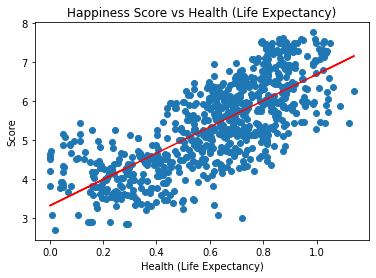

In [20]:
# Plot relationship between Life Expectancy and Happiness Score
plot_features('Health (Life Expectancy)', 'Score', 'Happiness Score vs Health (Life Expectancy)')

#### In the plot above there appears to be a strong positive linear correlation between Health (Life Expectancy) and Happiness scores. Indicating that as Life Expectancy increases, Happiness scores tend to increase. This shows that countries with higher life expectancies seem to be happier, so life expectancy can be one of the features used for predicting a country's happiness score. 

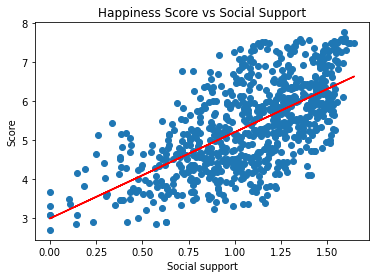

In [21]:
# Plot relationship between Social Support and Happiness Score
plot_features('Social support', 'Score', 'Happiness Score vs Social Support')

#### In the plot above there appears to be a positive correlation between Social Support and Happiness scores. Across countries there appears to be clustering towards higher Social support. This positive correlation indicates that as Social support increases Happiness scores tend to increase. Since social support seems to positively influence happiness scores, it can be a feature used to predict the happiness score of a country.

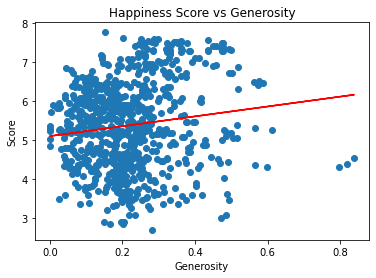

In [22]:
# Plot relationship between Generosity and Happiness Score
plot_features('Generosity', 'Score', 'Happiness Score vs Generosity')

#### In the plot above there does not appear to be a relationship between Generosity and Happiness Scores across countries. Across countries there appears to be clustering towards lower Generosity. The data does not seem to follow a trend and the Happiness Score is randomly spread indicating there is no correlation. Generosity does not seem useful for predicting the happiness score of a country.

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

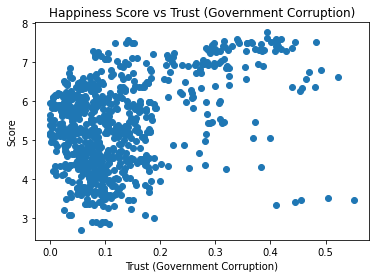

In [23]:
# Since a regression line cannot be plotted for this data, only the scatter plot is created
plt.scatter(df['Trust (Government Corruption)'], df['Score'])
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Score') 
plt.title('Happiness Score vs Trust (Government Corruption)')

plt

#### In the plot above it does not appear that there is a relationship between Trust (Government Corruption) and Happiness scores. Across countries there appears to be clustering towards lower trust which indicates government corruption. The data seems to be randomly spread and there is no strong trends or patterns that can be identfied. This indicates that a population's trust in the government is not a feature that can be used to predict happiness scores. 

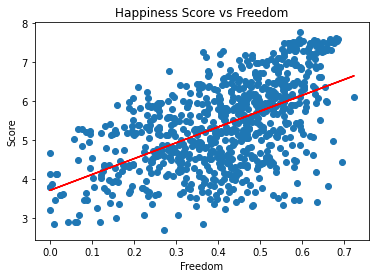

In [24]:
# Plot relationship between Freedom and Happiness Score
plot_features('Freedom', 'Score', 'Happiness Score vs Freedom')

#### In the plot above, there appears to be a weak positive correlation between Freedom and Happiness Score. As freedom increases, it is clear that happiness increases, however the data is loosely correlated since its is spread out more and not all data points are close to the regression line. Although there is weak positive correlation, this feature of Freedom can be used as a predictor of happiness for a country. 

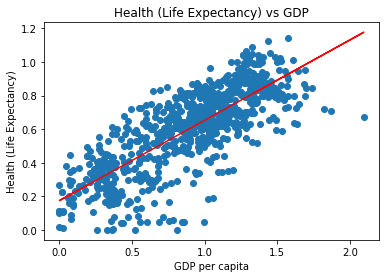

In [25]:
# Plot relationship between Life Expectancy and GDP
plot_features('GDP per capita', 'Health (Life Expectancy)', 'Health (Life Expectancy) vs GDP')

#### In the plot above there appears to be a strong postive linear correlation between GDP per capita and Health (Life Expectancy). As GDP per capita increases Life Expectancy tends to increase. This shows how a lot of the variables which have positive correlations with Happiness Scores also go hand in hand and have positive correlations with each other. This could indicate that certain features may influence and be related to these positive correlations. However, it is difficult to determine which features influence what, so for the sake of analysis and predicting happiness score of a country it is important to consider all features that seem to be correlated with a country's happiness score. 

#### To better see the relationships between different features in the data set, a heat map can be created to show the correlation between features. To examine the correlations using a heat map, Seaborn has a function **heatmap** which can allow us to easily build a heat map. In the correlation matrix, the higher the correlation is between two variables, the darker the shade of blue, representing that two variables are more correlated. 

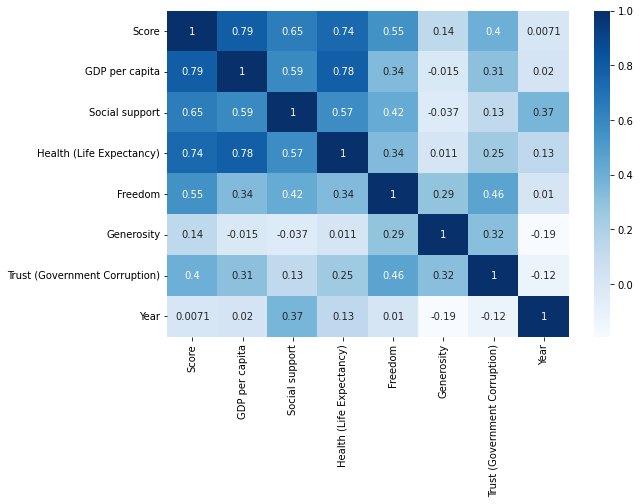

In [26]:
# Create and plot heat map
plt.figure(figsize=(9,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### As explored in our previous analysis with the scatter plots, it is clear which features are more strongly correlated with happiness score in the correlation heat map. GDP per capita is the feature that is most strongly correlated with Happiness Score. Other features such as Trust and Government Corruption are weakly correlated and may not be useful for predicting the happiness score of a country since they do not seem to influence happiness score values. It may be useful to examine features with correlation scores greater than .5 to predict the happiness score of a country. 

#### For more information on heat maps, we found this excellent source which explains how to read and interpret heat maps:

#### https://cartographicperspectives.org/index.php/journal/article/download/cp80-deboer/1420?inline=1

## 4. Machine Learning

### Now that we know what features are correlated to happiness score and seem to influence the happiness score of a country, we can train machine learning models to learn trends between these features to predict the happiness score of a country. Knowing which features are optimal for creating higher happiness scores in a country can help policy-makers in making decisions that will best keep their populations content. It can also help us analyze what features are important for happiness. In the following section, we analyze the data using two different regression models. First, we create a linear regression model that accounts for all the features that seem to have a correlation with happiness scores. Second, we create a Random Forest Regression model which predicts happiness scores using the values of features. 

### 4.1 Dataset Standardization (Create training and testing datasets)

#### The next step is to create training and testing datasets which can be used to train our model and test its accuracy. To do so we must extract the features we want to use for predicting happiness score and split the data into training and testing datasets.

In [27]:
# Copy the original dataset to another variable
ML_data = df

# Drop columns that have weak correlation to happiness scores and are not useful for predicting a country's happiness score
ML_data = ML_data.drop(['Country', 'Year', 'Trust (Government Corruption)', 'Generosity'], axis = 1)

# Visualize the dataframe
ML_data

,Score,GDP per capita,Social support,Health (Life Expectancy),Freedom,Region
0,7.769,1.34000,1.58700,0.98600,0.59600,Western Europe
1,7.600,1.38300,1.57300,0.99600,0.59200,Western Europe
2,7.554,1.48800,1.58200,1.02800,0.60300,Western Europe
3,7.494,1.38000,1.62400,1.02600,0.59100,Western Europe
4,7.488,1.39600,1.52200,0.99900,0.55700,Western Europe
...,...,...,...,...,...,...
777,3.465,0.22208,0.77370,0.42864,0.59201,Sub-Saharan Africa
778,3.340,0.28665,0.35386,0.31910,0.48450,Sub-Saharan Africa
779,3.006,0.66320,0.47489,0.72193,0.15684,Middle East and Northern Africa
780,2.905,0.01530,0.41587,0.22396,0.11850,Sub-Saharan Africa


In [28]:
# Encode the categorical feature being examined, Region, with LabelEncoder
le = sklearn.preprocessing.LabelEncoder()
ML_data['Region'] = le.fit_transform(ML_data['Region'])

In [29]:
# Use RobustScaler for numerical features
numerical = ['Score', 'Freedom', 'Health (Life Expectancy)', 'Social support','GDP per capita']
rs = RobustScaler()
ML_data[numerical] = rs.fit_transform(ML_data[numerical])

#### Split the dataset. For holdout validation, 30% of the data is left as test data.

In [30]:
y = ML_data['Score']
X = ML_data.drop(['Score'],axis=1)

In [31]:
# 30% of the data is left as testing data for holdout validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### 4.2 Linear Regression Model
#### A linear regression or Ordinary Least Squares (OLS) model is the most simple regression model that can be used for examining data. It identifies linear trends between features and uses these trends to predict a value. Linear regression trains the model to find parameters that can help predict happiness score in this situation.

#### Build Model

In [32]:
# initialize the model
model = LinearRegression()
# fit the model 
model.fit(X_train, y_train)
# predictions 
prediction = model.predict(X_test)
# compute the accuracy of the model
accuracy = model.score(X_test, y_test)
training_accuracy = model.score(X_train, y_train)
# compute root mean squared error of the model
root_mean_squared_error = np.sqrt(mean_squared_error(y_test, prediction))

print("Linear Regression Model Accuracy on Training Data: " + str(training_accuracy*100) + "%")
print("Linear Regression Model Accuracy on Test Data: " + str(accuracy*100) + "%")
print("The Root Mean Squared Error of the testing set for the Linear Regression Model is: " + str(root_mean_squared_error))

Linear Regression Model Accuracy on Training Data: 74.90809562604257%
Linear Regression Model Accuracy on Test Data: 76.36345627038622%
The Root Mean Squared Error of the testing set for the Linear Regression Model is: 0.331466816954053


#### To gauge the model performance the performance metric accuracy was used. This represents how many data points were correctly predicted. The accuracy or score of the linear regression model on the test data is around 76%. The model performance is average however there still is much room for improvement. We can try experimenting with a different machine learning model or perform some more hyperparameter tuning to pick features that are strong predictors of happiness score. The Root Mean Squared Error is relatively low for the model around .33. This is a good sign because it is our goal to minimize error in our model. The model performs around the same on both the training and testing datasets. This can be resolved by tuning parameters and using less features to train our model.

### Calculate p values

In [33]:
# use ordinary least square method for regression 
est = sm.OLS(y, X)
est2 = est.fit()

# summarize model to see p values
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Score   R-squared (uncentered):                   0.746
Model:                            OLS   Adj. R-squared (uncentered):              0.745
Method:                 Least Squares   F-statistic:                              457.5
Date:                Mon, 20 Dec 2021   Prob (F-statistic):                   1.10e-228
Time:                        16:26:27   Log-Likelihood:                         -261.79
No. Observations:                 782   AIC:                                      533.6
Df Residuals:                     777   BIC:                                      556.9
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

#### The p value, which is the probability of the observed results given the null hypothesis is true, for the data is 0.000 across all features, which means they are so small that the null hypothesis can be rejected. This means a significant linear correlation exists for all the features.

#### For more information on how Linear Regression models please refer to the following resource:

#### https://machinelearningmastery.com/linear-regression-for-machine-learning/

### 4.3 Random Forest Regression Model
#### A Random Forest Regression model creates a specified number of decision tree estimators to help predict a value based off of given features. The values produced by these estimators are then used to predict one value. In this case, a Random Forest Regression Model can be used to analyze the correlated features to create a model that can predict the happiness score of a country. 

#### Build Model

##### For the model we chose 10 estimators because it seemed to give us the optimal model accuracy without using too many estimators. 

In [34]:
# Train model
rf_model = ensemble.RandomForestRegressor(n_estimators = 10)
rf_model.fit(X_train,y_train)

# test model
rf_prediction = rf_model.predict(X_test)


# performance metrics
rf_accuracy = rf_model.score(X_test,y_test)
rf_training_accuracy = rf_model.score(X_train, y_train)

# compute root mean squared error of the model
rf_root_mean_squared_error = np.sqrt(mean_squared_error(y_test, rf_prediction))


print("Random Forest Model Accuracy on Training Data: " + str(rf_training_accuracy*100) + "%")
print("Random Forest Model Accuracy on Test Data: " + str(rf_accuracy*100) + "%")
print("The Root Mean Squared Error of the testing set for the Random Forest Model is: " + str(rf_root_mean_squared_error))

Random Forest Model Accuracy on Training Data: 96.40018791769964%
Random Forest Model Accuracy on Test Data: 83.7177559719214%
The Root Mean Squared Error of the testing set for the Random Forest Model is: 0.275109255498767


#### To observe model performance, one can see that this model performs much better than the linear regression model. The Random Forest Regression model has around an 83% accuracy rate when it comes to predicting a country's happiness score. The Root Mean Squared error is around .27 which is lower than the Linear Regression model, meaning this model better minimizes error. One thing, however, is the accuracy of the model on the training data is really high. This could inidcate that we are overfitting the model to the training data. This can be resolved by adding more training data, or tuning model parameters. 

#### For more information about a random forest regression model, we found an excellent resources which explain the model: 
#### https://levelup.gitconnected.com/random-forest-regression-209c0f354c84

#### https://builtin.com/data-science/random-forest-algorithm

## 5. Conclusion

### The purpose of this project was to explore the question of what features impact a country's happiness score and can be used to predict a country's happiness score. Upon data exploration and examination of features that could have influenced happiness score that were present in the dataset, it was clear which features correlated with a country's happiness score. With the features that were found to correlate with a country's happiness score, machine learning models were built to predict a country's happiness score. This information could be useful because it can help countries learn what are good indicators of the happiness of their population. It also shows how countries can change in order to improve features such as GDP, freedom, or life expectancy to result in higher happiness scores and make the world a happier place. The machine learning models we built can help many countries with making policy decisions in order to benefit the happiness of their populations. Overall, the data is informative of what features are linked to a higher quality of life. 